In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
train= pd.read_csv('titanic_train.csv')
test= pd.read_csv('titanic_test.csv')

In [147]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<AxesSubplot:>

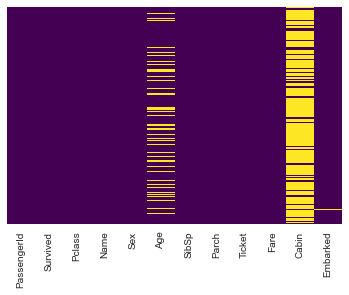

In [148]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [149]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

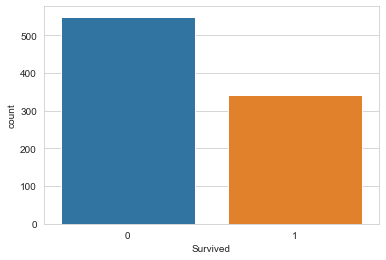

In [150]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

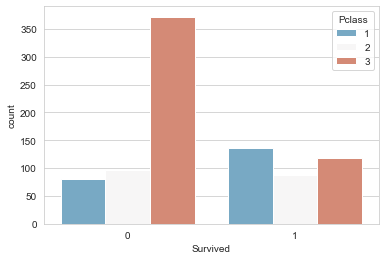

In [151]:
sns.countplot(x='Survived', data=train,hue='Pclass',palette='RdBu_r')

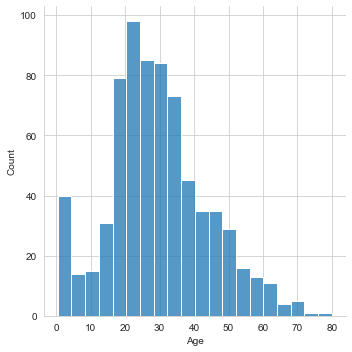

In [152]:
sns.displot(train['Age'].dropna())

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

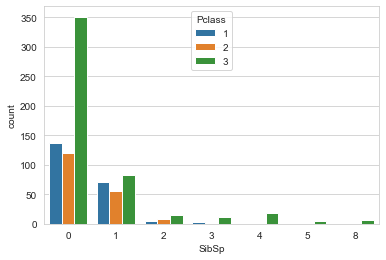

In [154]:
sns.countplot(x='SibSp',data=train,hue='Pclass')

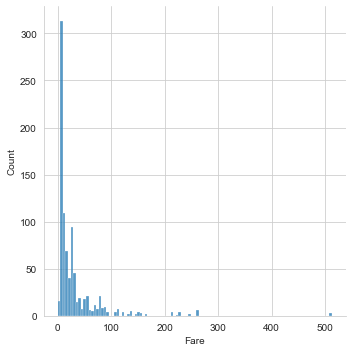

In [155]:
sns.displot(x=train['Fare'])

In [156]:
import cufflinks as cf

In [157]:
cf.go_offline()

In [158]:
#train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

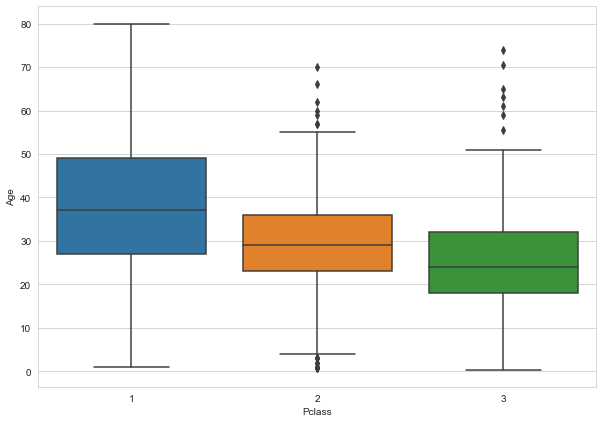

In [159]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [160]:
def imp_age_test(a):
    age=a[0]
    clas=a[1]
    if pd.isnull(age):
        if clas==1:
            return test[test['Pclass']==1]['Age'].mean()
        if clas==2:
            return test[test['Pclass']==2]['Age'].mean()
        if clas==3:
            return test[test['Pclass']==3]['Age'].mean()
    else:
        return age

In [161]:
def imp_age(a):
    age=a[0]
    clas=a[1]
    if pd.isnull(age):
        if clas==1:
            return train[train['Pclass']==1]['Age'].mean()
        if clas==2:
            return train[train['Pclass']==2]['Age'].mean()
        if clas==3:
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return age

In [162]:
train['Age']=train[['Age','Pclass']].apply(imp_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(imp_age,axis=1)

<AxesSubplot:>

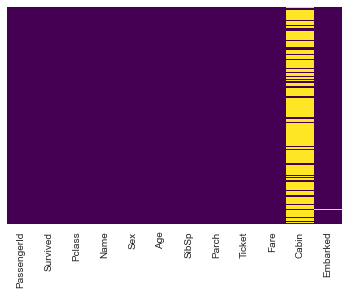

In [163]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

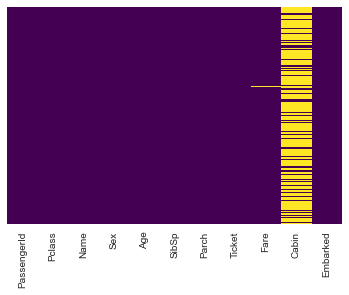

In [164]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [165]:
train.drop('Cabin',axis=1,inplace=True)

In [166]:
test.drop('Cabin',axis=1,inplace=True)

In [167]:
train.dropna(inplace=True)


In [168]:
test.dropna(inplace=True)

<AxesSubplot:>

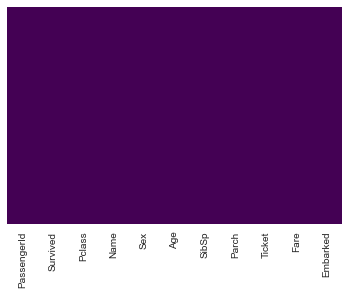

In [169]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

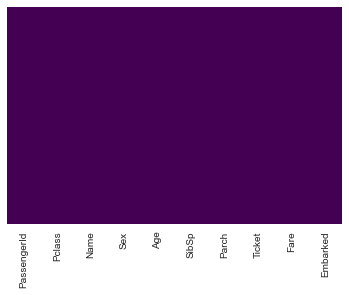

In [170]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [171]:
sex1=pd.get_dummies(test['Sex'],drop_first=True)
embark1=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,sex1,embark1],axis=1)

In [172]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [173]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [174]:
train=pd.concat([train,sex,embark],axis=1)

In [175]:
train.drop(['Name','Embarked','Sex','Ticket'],inplace=True,axis=1)

In [176]:
train.drop('PassengerId',inplace=True,axis=1)

In [177]:
test.drop(['Name','Embarked','Sex','Ticket'],inplace=True,axis=1)
test.drop('PassengerId',inplace=True,axis=1)

In [179]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [182]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,0,1
4,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.14062,0,0,8.0500,1,0,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,0,1
416,3,25.14062,0,0,8.0500,1,0,1


In [183]:
from sklearn.model_selection import train_test_split

In [184]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [186]:
log= make_pipeline(StandardScaler(), LogisticRegression())

In [187]:
log.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [188]:
predictions=log.predict(xtest)

In [189]:
from sklearn.metrics import classification_report,confusion_matrix

In [190]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [192]:
confusion_matrix(ytest,predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [193]:
pred=log.predict(xtest)

In [204]:
pd.Series(pred).value_counts()

0    183
1     84
dtype: int64